In [28]:
import math
import sys

import IPython
import IPython.display as ipd
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

%reload_ext autoreload
%autoreload 2

%matplotlib inline
#%matplotlib notebook

from matplotlib import rcParams

rcParams["figure.max_open_warning"] = False
rcParams["font.family"] = 'DejaVu Sans'
rcParams["font.size"] = 12

In [2]:
def get_calib_function(calib="stepper"):
    from calibration import get_calibration_function_median
    from calibration import get_calibration_function_moving
    
    if calib == "manual":
        print("using manual")
        calib_function_median, freqs = get_calibration_function_moving(
            "2021_07_27_manual", motors="all45000", fit_one_gain=False
        )
    elif calib == "flying":
        print("using flying")
        calib_function_median, freqs = get_calibration_function_moving(
            "2021_10_12_flying", motors="linear_buzzer_cont", fit_one_gain=False,
            #"2021_07_14_flying", motors="linear_buzzer_cont", fit_one_gain=False,
            appendix_list=["_new3", "_new4", "_new6"], 
        )
    elif calib == "hover":
        print("using hovering")
        calib_function_median, freqs = get_calibration_function_moving(
            #"2021_07_27_hover", 
            "2021_10_12_hover", 
            motors="hover_sweep", fit_one_gain=False,
            #appendix_list=["_30", "_50"]
        )
    elif calib == "stepper":
        print("using stepper dataset")
        calib_function_median, freqs = get_calibration_function_median(
            #"2021_07_08_stepper_fast",
            "2021_10_07_stepper_new_f",
            motors="all45000",
            mic_type="audio_deck",
            snr=5,
            fit_one_gain=False,
        )
    elif calib == "stepper_nomotors":
        print("using stepper dataset without motors")
        calib_function_median, freqs = get_calibration_function_median(
            #"2021_07_08_stepper_fast",
            "2021_10_07_stepper_new_f",
            motors=0,
            mic_type="audio_deck",
            snr=5,
            fit_one_gain=False,
        )
    else:
        raise ValueError(calib)
    return calib_function_median

# Calibration study

read ../experiments/2021_10_07_stepper_new_f/backup_audio_deck_05.pkl
saved as plots/experiments/calibration_stepper_nomotors.pdf
plottting 29
saved as plots/experiments/calibration_stepper_nomotors_variance.pdf
read ../experiments/2021_10_07_stepper_new_f/backup_audio_deck_all450005.pkl
saved as plots/experiments/calibration_stepper_motors.pdf
plottting 29
saved as plots/experiments/calibration_stepper_motors_variance.pdf


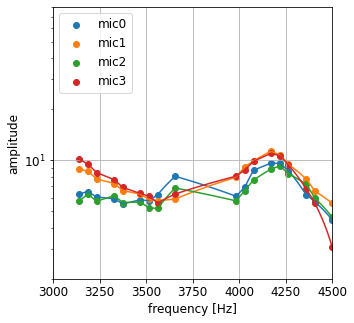

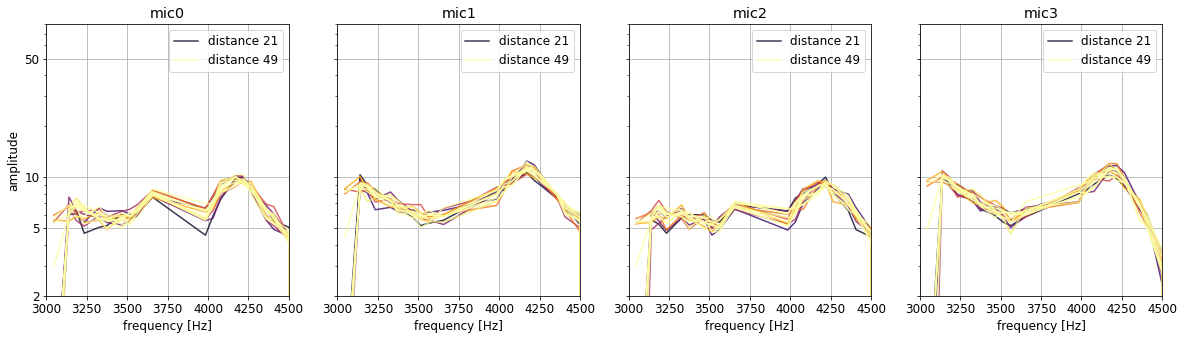

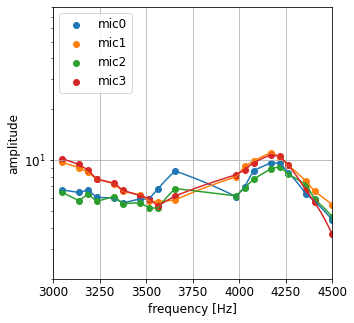

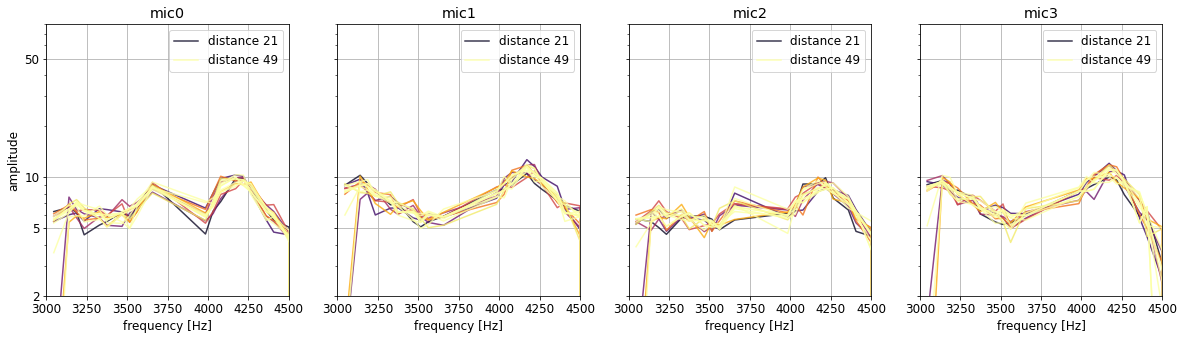

In [3]:
from calibration import get_calibration_function_median
from plotting_tools import save_fig

from matplotlib import cm
cmap = cm.get_cmap('inferno')

MICS = [0, 1, 2, 3]
XLIM = [3000, 4500]
YLIM = [2, 80]
YTICKS = [2, 5, 10, 50]
SIZE = [5, 5]

#exp_name = "2021_07_08_stepper_fast"; snr=5
exp_name = "2021_10_07_stepper_new_f"; snr=5

results_df = pd.read_pickle(f"../experiments/{exp_name}/all_data.pkl")
results_df = results_df.loc[results_df.bin_selection == 5]

for motors in [0, "all45000"]:
    flag = "no" if motors == 0 else ""
    fname = f"plots/experiments/calibration_stepper_{flag}motors"

    fig, ax = plt.subplots()
    fig.set_size_inches(*SIZE)
    calib_function_median, freqs = get_calibration_function_median(
        exp_name, mic_type="audio_deck", snr=snr, motors=motors, ax=ax
    )
    #ax.set_title(f"stepper, with {flag} motors")
    ax.legend(loc='upper left')
    ax.set_yscale("log")
    ax.set_xlim(*XLIM)
    ax.set_ylim(*YLIM)
    save_fig(fig, fname + ".pdf")
    
    rows = results_df.loc[results_df.motors == motors]
    
    fig, axs = plt.subplots(1, len(MICS), sharey=True)
    fig.set_size_inches(5*len(MICS), 5)
    print("plottting", len(rows))
    number = len(rows)/2
    for mic_i in MICS:
        label = f"distance {rows.iloc[0].distance}"
        for i, (_, row) in enumerate(rows.iterrows()):
            if i % 2 == 0:
                continue
            stft = row.stft[0]
            freq = row.frequencies_matrix[0]
            #for i, (stft, freq) in enumerate(zip(row.stft, row.frequencies_matrix)):
            color = cmap(i / (1.1 * number))
            axs[mic_i].plot(
                freq[freq > 0],
                np.abs(stft[mic_i, freq > 0]),
                color=color,
                alpha=0.8,
                label=label,
            )
            label = None
    axs[mic_i].set_yscale("log")
    label = f"distance {rows.iloc[-1].distance}"
    for m in MICS:
        axs[m].plot(
            freq[freq > 0],
            np.abs(stft[m, freq > 0]),
            color=color,
            alpha=0.8,
            label=label,
        )
        axs[m].legend(loc="upper right")
        axs[m].set_xlim(*XLIM)
        axs[m].set_xlabel("frequency [Hz]")
        axs[m].grid()
        axs[m].set_title(f"mic{m}")
    axs[0].set_ylim(*YLIM)
    axs[0].set_yticks(YTICKS)
    axs[0].set_yticklabels(YTICKS)
    axs[0].set_ylabel("amplitude")
    save_fig(fig, fname + "_variance.pdf")

0
173 / 232 flying
crash at 155
2
24 / 34 flying
no crash
5
24 / 32 flying
no crash
saved as plots/experiments/calibration_flying_motors.pdf
crash at 155
plotting 139
plotting 139
plotting 139
plotting 139
saved as plots/experiments/calibration_flying_motors_variance_new4.pdf
 no crash
plotting 24
plotting 24
plotting 24
plotting 24
saved as plots/experiments/calibration_flying_motors_variance_new6.pdf
 no crash
plotting 24
plotting 24
plotting 24
plotting 24
saved as plots/experiments/calibration_flying_motors_variance_new3.pdf


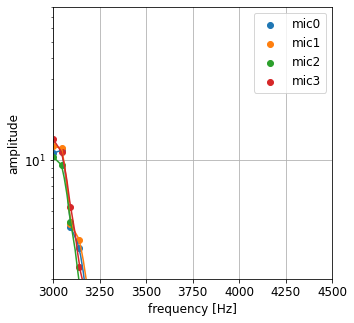

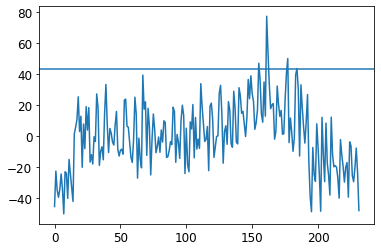

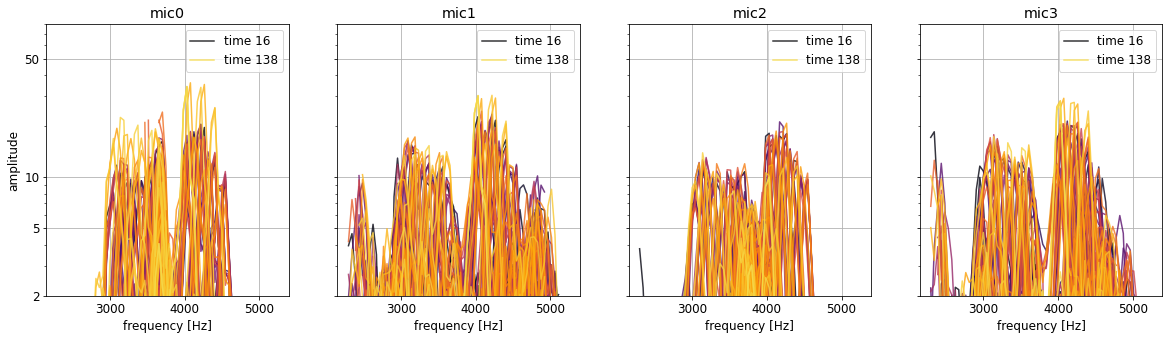

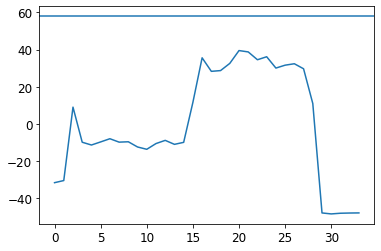

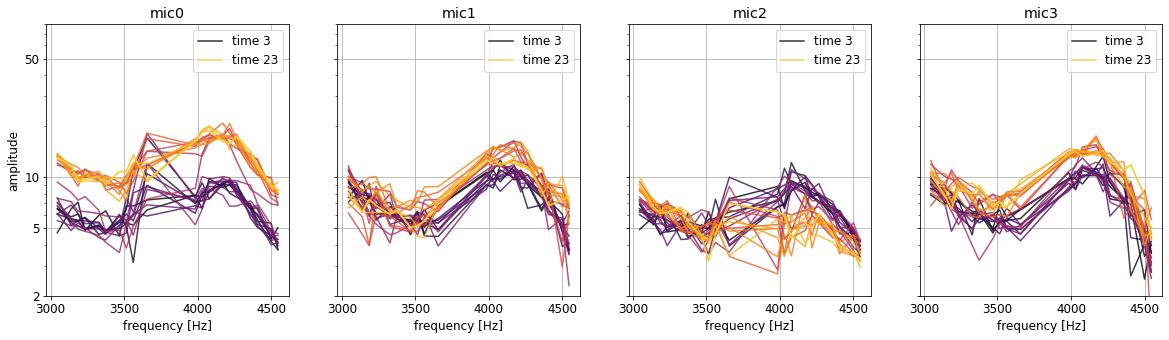

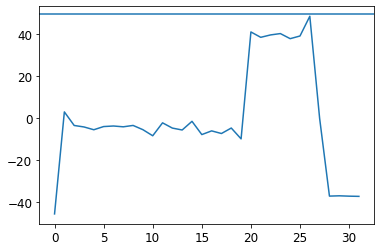

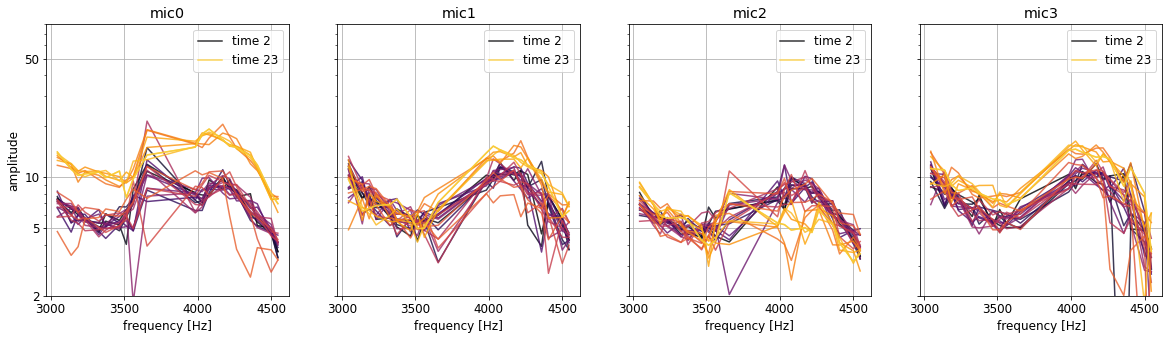

In [4]:
from calibration import get_calibration_function_moving

#name = "manual"
name = "flying"

if name == "manual":
#appendix_list=["", "_2", "_3", "_4"]; motors_list = [0, "all45000"];
    exp_name = "2021_07_27_manual"; motors_list=[0, "all45000"]; appendix_list=["_3"]

elif name == "flying":
#appendix_list=["_17", "_18", "_19"]
    #exp_name = "2021_07_14_flying"; motors_list = ["linear_buzzer_cont"]; appendix_list=["_17"]
    #exp_name = "2021_10_12_flying"; motors_list = ["linear_buzzer_cont"]; appendix_list = ["_1", "_2", "_3"]
    exp_name = "2021_10_12_flying"; motors_list = ["linear_buzzer_cont"]; appendix_list = ["_new3", "_new4", "_new6"]

results_df = pd.read_pickle(f"../experiments/{exp_name}/all_data.pkl")

for motors in motors_list:
    flag = "no" if motors == 0 else ""
    fname = f"plots/experiments/calibration_{name}_{flag}motors"
    
    fig_total, ax_total = plt.subplots()
    fig_total.set_size_inches(*SIZE)
    get_calibration_function_moving(exp_name, motors=motors, fit_one_gain=False, ax=ax_total, 
                                    appendix_list=appendix_list, verbose=True)
    ax_total.set_yscale("log")
    ax_total.set_ylim(*YLIM)
    ax_total.set_xlim(*XLIM)
    save_fig(fig_total, fname + ".pdf")
    
    rows = results_df.loc[(results_df.motors==motors) & 
                          (results_df.appendix.isin(appendix_list))]
    for i_row, row in rows.iterrows():
        
        magnitudes = np.sum(np.mean(np.abs(row.stft), axis=1), axis=-1) # dist
        plt.figure()
        plt.plot(magnitudes - np.mean(magnitudes))
        plt.axhline(2 * np.std(magnitudes))
        crash = np.where((magnitudes - np.mean(magnitudes)) > (2 * np.std(magnitudes)))[0]
        if len(crash) > 0:
            crash = crash[0]
            print('crash at', crash)
        else:
            crash = len(magnitudes) - 1
            print(' no crash')
        
        fig, axs = plt.subplots(1, len(MICS), sharey=True)
        fig.set_size_inches(5*len(MICS), 5)
        for mic_i in MICS:
            valid_mask = (row.positions[:, 2] > 0.3) 
            valid_mask[crash:] = 0
            number = np.sum(valid_mask)
            print("plotting", number)
            label = f'time {np.where(valid_mask)[0][0]}'
            for i, (stft, freq) in enumerate(zip(row.stft[valid_mask], row.frequencies_matrix[valid_mask])):
                color = cmap(i/(1.1*number))
                axs[mic_i].plot(freq[freq > 0], np.abs(stft[mic_i, freq>0]), color=color, alpha=0.8, label=label)
                label = None
            label = f'time {i}'
            axs[mic_i].set_yscale("log")
            axs[mic_i].plot(freq[freq > 0], np.abs(stft[mic_i, freq>0]), color=color, alpha=0.8, label=label)
            axs[mic_i].legend(loc='upper right')
            axs[mic_i].grid()
            axs[mic_i].set_xlabel('frequency [Hz]')
            axs[mic_i].set_title(f"mic{mic_i}")
        axs[0].set_ylim(*YLIM)
        axs[0].set_yticks(YTICKS)
        axs[0].set_yticklabels(YTICKS)
        axs[0].set_ylabel("amplitude")
        save_fig(fig, fname + f"_variance{row.appendix}.pdf")
            
        #ax_total.plot(freq[freq > 0], np.abs(stft_average[mic_i, freq>0]), color=f"C{mic_i}")
        #ax_total.grid()
        #ax_total.legend()

# 3 by 3 study

### use stepper motor data

In [5]:
from crazyflie_description_py.experiments import WALL_ANGLE_DEG_STEPPER, WALL_DISTANCE_CM_STEPPER
#exp_name = "2021_07_08_stepper_fast"
exp_name = "2021_10_07_stepper_new_f"
calib = "stepper_nomotors"

azimuth_deg = WALL_ANGLE_DEG_STEPPER

distance_nom = 47
#distance_nom = 30
stft_list = []
freqs_list = []
pos_list = []
mics = [0, 1, 3]
start_i = 0 # for naming only
n_sweeps_per = 3

results_df = pd.read_pickle(f"../experiments/{exp_name}/all_data.pkl")

print(results_df.distance.unique())
print(results_df.bin_selection.unique())
print(results_df.motors.unique())

for distance in np.arange(distance_nom-2,distance_nom+2):
    print(distance)
    #d_corr = distance - WALL_DISTANCE_CM_STEPPER
    #print(d_corr)
    d_corr = distance
    row = results_df.loc[(results_df.distance == d_corr) &
                          (results_df.bin_selection == 5) &
                          (results_df.motors == "all45000"), :].iloc[0]

    label = f"stepper at {distance}"

    stft_list += list(row.stft)[:n_sweeps_per]
    freqs_list += list(row.frequencies_matrix)
    pos_list += list(np.array([[0, distance]] * row.stft.shape[0]))
    print(len(stft_list))
    
n_sweeps = len(stft_list)

fname = f"plots/experiments/{exp_name}_by3_distance{distance_nom}"

[21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
 45 46 47 48 49]
[5]
[0 'all45000']
45
3
46
6
47
9
48
12


In [6]:
def get_positions(row, end_distance=None, start_distance=None, min_height=0.1, use_landing=True):
    
    # the end positions is more robust than the starting position.
    second_half = row.positions[row.positions.shape[0]//2:, :]
    
    # end position is where drone lands
    if use_landing:
        try:
            end_position = second_half[second_half[:, 2] < min_height, :][0, :2]
        except:
            print('did not detect end position with height. did drone land?')
            end_position = row.positions[-1, :2]
            
    # end position when drone crashed in wall
    else: 
        end_idx = np.nanargmax(row.positions[:, 1])
        end_position = row.positions[end_idx, :2]
    
    if row.appendix in ["", "_30"]:
        print("assuming end position at 30cm from wall")
        END_POS = np.array([0.0, 0.3])
    elif row.appendix in ["_40", "_41", "_42", "_44"]:
        print("assuming start position at 40cm from wall")
        START_POS = np.array([0.0, 0.4])
        print('start position:', row.positions[0, :])
        positions_cm = np.c_[-row.positions[0, 0] + START_POS[0] - row.positions[:, 0],
                             -row.positions[0, 1] + START_POS[1] - row.positions[:, 1],
                             row.positions[:, 2]] * 1e2
        #positions_cm = row.positions[:, :2] * 1e2
        return positions_cm
        
    elif row.appendix in ["_50"]:
        print("assuming end position at 50cm from wall")
        END_POS = np.array([0.0, 0.5])
    else: # crashed into wall
        print("assuming end position at", end_distance)
        END_POS = np.array([0.0, end_distance * 1e-2])
        
    delta = end_position + END_POS
    positions_cm = np.c_[delta[0] - row.positions[:, 0],
                         delta[1] - row.positions[:, 1], 
                         row.positions[:, 2]] * 1e2
    return positions_cm

### use hovering data

In [7]:
from crazyflie_description_py.experiments import WALL_ANGLE_DEG

#exp_name = "2021_07_27_hover"; 
exp_name = "2021_10_12_hover"; 
calib = "stepper_nomotors"
#calib = "hover"


#appendix = "_30" # old datasets
#appendix = "_50" # old datasets
appendix = "_42" # new datasets

# for old datasets
#appendix = f"_{distance}"

azimuth_deg = WALL_ANGLE_DEG

results_df = pd.read_pickle(f"../experiments/{exp_name}/all_data.pkl")
row = results_df.loc[results_df.appendix == appendix, :].iloc[0]


label = f"hover at {distance}"
mics = [0, 1, 2]

# choose three sweeps to plot
start_i = 3
n_sweeps = 10

pos_list = get_positions(row) 

#for start_i in np.arange(row.stft.shape[0]-n_sweeps)[::3]:
chosen_sweeps = np.arange(start_i, start_i+n_sweeps)
stft_list = row.stft[chosen_sweeps]
freqs_list = row.frequencies_matrix[chosen_sweeps]
pos_list = pos_list[chosen_sweeps, :]
dist_average = np.mean([p[1] for p in pos_list])
print('average distance', dist_average)

fname = f"plots/experiments/{exp_name}_by3_distance{distance}"

assuming start position at 40cm from wall
start position: [0.05946504 0.02383752 0.45252502 0.89034325]
average distance 17.721998877823353


using stepper dataset without motors
read ../experiments/2021_10_07_stepper_new_f/backup_audio_deck_05.pkl
(10, 3, 32) (10, 3, 70)
saved as plots/experiments/2021_10_12_hover_by3_distance48_start3_n10_stepper_nomotors_pos.pdf
saved as plots/experiments/2021_10_12_hover_by3_distance48_start3_n10_stepper_nomotors_pos_wall.pdf
saved as plots/experiments/2021_10_12_hover_by3_distance48_start3_n10_stepper_nomotors_data.pdf
saved as plots/experiments/2021_10_12_hover_by3_distance48_start3_n10_stepper_nomotors_prob.pdf
saved as plots/experiments/2021_10_12_hover_by3_distance48_start3_n10_stepper_nomotors_.pdf


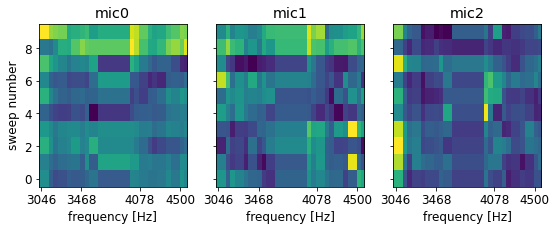

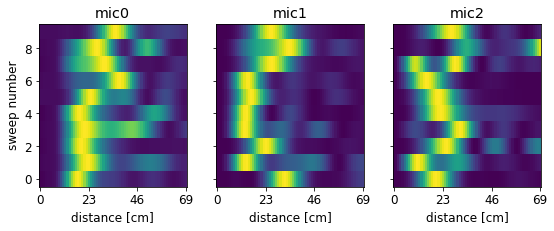

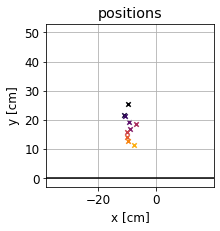

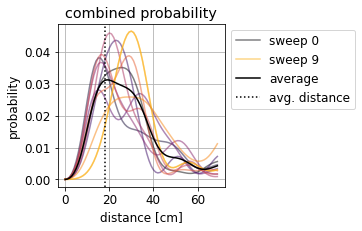

In [8]:
from estimators import DistanceEstimator
from inference import Inference, eps_normalize
from plotting_tools import save_fig, pcolorfast_custom
from matplotlib import cm
import scipy

cmap = cm.get_cmap("inferno")
distance_range = [0.0, 70.0]
distances = np.arange(*distance_range)

calib_function_median = get_calib_function(calib)

# for start_i in np.arange(row.stft.shape[0]-n_sweeps-1)[::3]:
#    chosen_sweeps = np.arange(start_i, start_i+n_sweeps)
#    stft_list = row.stft[chosen_sweeps]
#    freqs_list = row.frequencies_matrix[chosen_sweeps]
#    pos_list = get_positions(row, chosen_sweeps)
#    if pos_list is None: # invalid position
#        continue
dist_average = np.nanmedian([p[1] for p in pos_list])

fig_slice, ax_slice = plt.subplots(1, len(mics), sharey=True)
fig_slice.set_size_inches(3 * len(mics), 3)

fig_prob, ax_prob = plt.subplots(1, len(mics), sharey=True)
fig_prob.set_size_inches(3 * len(mics), 3)

fig_pos, ax_pos = plt.subplots()
fig_pos.set_size_inches(3, 3)
fig_total, ax_total = plt.subplots()
fig_total.set_size_inches(3, 3)

#### Treat all stfts individually
inf_machine = Inference()
inf_machine.add_calibration_function(calib_function_median)
inf_machine.add_geometry(distance_range, azimuth_deg)

distance_estimator_all = DistanceEstimator()

stft_matrix = np.empty((len(stft_list), len(mics), stft_list[0].shape[1]))
stft_matrix_calib = np.empty((len(stft_list), len(mics), stft_list[0].shape[1]))
prob_matrix = np.empty((len(stft_list), len(mics), len(distances)))
print(stft_matrix.shape, prob_matrix.shape)


label = f'sweep 0'
for i, (stft, freqs, pos) in enumerate(zip(stft_list, freqs_list, pos_list)):
    color = cmap(i / (1.1 * len(stft_list)))  #f"C{i}"

    ax_pos.scatter(pos[0], pos[1], s=20.0, marker="x", color=color)

    inf_machine.add_data(np.abs(stft), freqs)
    inf_machine.filter_out_freqs()

    distance_estimator = DistanceEstimator()

    stft_matrix[i, :, :] = np.abs(stft[mics, :])
    stft_matrix_calib[i, :, :] = np.abs(stft[mics, :]) / calib_function_median(freqs)[mics]

    for mic_i, mic_idx in enumerate(mics):
        dist, proba, diff = inf_machine.do_inference("bayes", mic_idx)

        interpolator = scipy.interpolate.interp1d(dist,
                                                  proba,
                                                  kind="linear",
                                                  fill_value="extrapolate")
        proba_int = interpolator(distances)
        prob_matrix[i, mic_i, :] = proba_int

        distance_estimator.add_distribution(diff * 1e-2, proba, mic_idx)
        distance_estimator_all.add_distribution(diff * 1e-2, proba, mic_idx)

    dist, proba = distance_estimator.get_distance_distribution(
        method="sum", distances_m=1e-2 * distances  
    )
    ax_total.plot(dist * 1e2,
                  proba,
                  #eps_normalize(proba, 1e-3),
                  color=color,
                  ls='-',
                  label=label,
                  alpha=0.5)
    label = None
    
label = f'sweep {i}'
ax_total.plot(dist * 1e2,
              proba, 
              #eps_normalize(proba, 1e-3),
              color=color,
              ls='-',
              label=label,
              alpha=0.5)

for mic_i in range(len(mics)):

    pcolorfast_custom(
        ax_slice[mic_i],
        freqs[freqs > 0],
        np.arange(len(stft_list)),
        stft_matrix_calib[:, mic_i, freqs > 0],
        n_xticks=3,
        n_yticks=5,
    )

    pcolorfast_custom(
        ax_prob[mic_i],
        distances,
        np.arange(len(stft_list)),
        prob_matrix[:, mic_i, :],
        n_xticks=3,
        n_yticks=5,
    )
    
dist, proba = distance_estimator_all.get_distance_distribution(
    method="sum",
    distances_m=1e-2 * distances,
    verbose=False)
ax_total.plot(
    dist * 1e2,
    proba,
    #eps_normalize(proba, 1e-3),
    color="k",
    ls="-",
    label="average",
)

#### Plot decorations
ax_prob[0].set_ylabel("sweep number")
ax_slice[0].set_ylabel("sweep number")
for m, mic_idx in enumerate(mics):
    ax_prob[m].set_xlabel("distance [cm]")
    ax_prob[m].set_title(f"mic{m}")

    ax_slice[m].set_xlabel("frequency [Hz]")
    ax_slice[m].set_title(f"mic{m}")

ax_pos.set_xlabel("x [cm]")
ax_pos.set_ylabel("y [cm]")
ax_pos.axis("equal")
ax_pos.grid()
ax_pos.set_title("zoom")

ax_total.set_xlabel("distance [cm]")
ax_total.set_ylabel("probability")
ax_total.set_title("combined probability")
ax_total.axvline(dist_average, ls=":", color="k", label="avg. distance")
ax_total.legend(loc="upper left", bbox_to_anchor=[1.0, 1.0])
ax_total.grid()

save_fig(fig_pos, f"{fname}_start{start_i}_n{n_sweeps}_{calib}_pos.pdf")
ax_pos.axhline(y=0, color='k')
ax_pos.set_ylim(-3, 53)
ax_pos.set_title("positions")
save_fig(fig_pos, f"{fname}_start{start_i}_n{n_sweeps}_{calib}_pos_wall.pdf")

save_fig(fig_slice, f"{fname}_start{start_i}_n{n_sweeps}_{calib}_data.pdf")
save_fig(fig_prob, f"{fname}_start{start_i}_n{n_sweeps}_{calib}_prob.pdf")
save_fig(fig_total, f"{fname}_start{start_i}_n{n_sweeps}_{calib}_.pdf")

using stepper dataset
read ../experiments/2021_10_07_stepper_new_f/backup_audio_deck_all450005.pkl
assuming end position at 30cm from wall
assuming end position at 50cm from wall


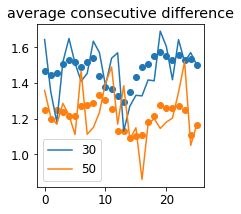

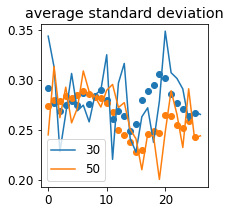

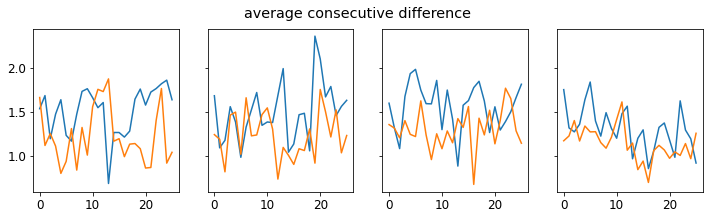

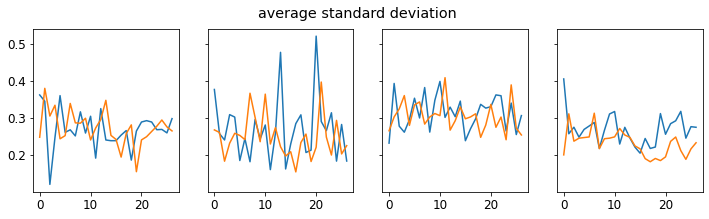

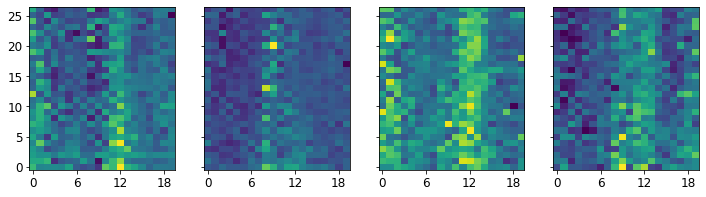

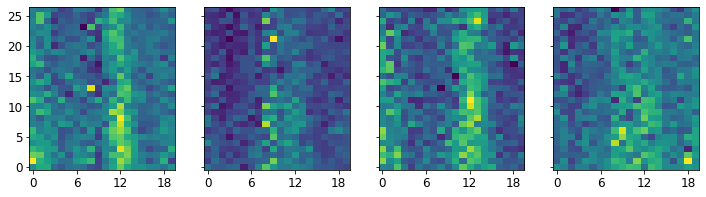

In [9]:
from crazyflie_description_py.experiments import WALL_ANGLE_DEG
from plotting_tools import save_fig

exp_name = "2021_07_27_hover"; 

#calib = "stepper_nomotors"
#calib = "hover"
calib = "stepper"

calib_function_median = get_calib_function(calib)

azimuth_deg = WALL_ANGLE_DEG

results_df = pd.read_pickle(f"../experiments/{exp_name}/all_data.pkl")
mics = range(4)
distances = [30, 50]

all_data = {d:None for d in distances}

fig, ax_diff = plt.subplots() #1, len(mics))
fig.set_size_inches(3, 3)
ax_diff.set_title(f'average consecutive difference')

fig, ax_var = plt.subplots() #1, len(mics))
fig.set_size_inches(3, 3)
ax_var.set_title(f'average standard deviation')

fig, ax_diff_mic = plt.subplots(1, len(mics), sharey=True) 
fig.set_size_inches(3 * len(mics), 3)
fig.suptitle(f'average consecutive difference')
fig, ax_var_mic = plt.subplots(1, len(mics), sharey=True) 
fig.set_size_inches(3 * len(mics), 3)
fig.suptitle(f'average standard deviation')
for col, distance in enumerate(distances):
    row = results_df.loc[results_df.appendix == f"_{distance}", :].iloc[0]

    pos_list = get_positions(row) 
    valid = pos_list[:, 2] > 30

    stft_list = row.stft[valid]
    freqs_list = row.frequencies_matrix[valid]
    pos_list = pos_list[valid, :]
    dist_average = np.mean([p[1] for p in pos_list])

    dist_average = np.nanmedian([p[1] for p in pos_list])

    stft_matrix_calib = np.empty((len(stft_list), len(mics), stft_list[0].shape[1]))
    for i, (stft, freqs, pos) in enumerate(zip(stft_list, freqs_list, pos_list)):
        stft_matrix_calib[i, :, :] = np.abs(stft[mics, :]) / calib_function_median(freqs)[mics]
    all_data[distance] = stft_matrix_calib
        
    consecutive_diff =  np.linalg.norm(
            stft_matrix_calib[1:, :, freqs > 0] - stft_matrix_calib[:-1, :, freqs>0], axis=2
    )
    var =  np.std(stft_matrix_calib[:, :, freqs > 0], axis=2)
    var_avg = np.mean(var, axis=1)
    diff_avg = np.mean(consecutive_diff, axis=1)
    ax_diff.plot(diff_avg, label=distance)
    ax_var.plot(var_avg, label=distance)
    
    # running mean
    n_mean = 5
    for i in range(var_avg.shape[0] - 1):
        ax_diff.scatter(i, np.mean(diff_avg[i:i+n_mean]), color=f'C{col}')
        ax_var.scatter(i, np.mean(var_avg[i:i+n_mean]), color=f'C{col}')
    ax_diff.legend(loc='lower left')
    ax_var.legend(loc='lower left')
    
    fig, ax_map = plt.subplots(1, len(mics), sharey=True) 
    fig.set_size_inches(3 * len(mics), 3)
    
    for mic_i in range(len(mics)):
        pcolorfast_custom(
            ax_map[mic_i],
            np.arange(len(freqs[freqs > 0])),
            np.arange(len(stft_list)),
            stft_matrix_calib[:, mic_i, freqs > 0],
            n_xticks=3,
            n_yticks=5,
        )
        
        ax_diff_mic[mic_i].plot(consecutive_diff[:, mic_i], label=distance)
        ax_var_mic[mic_i].plot(var[:, mic_i], label=distance)
        #ax_diff_mic[mic_i].set_yscale('log')
        #ax_var_mic[mic_i].set_yscale('log')
    #ax_diff.set_yscale('log')
    #ax_var.set_yscale('log')

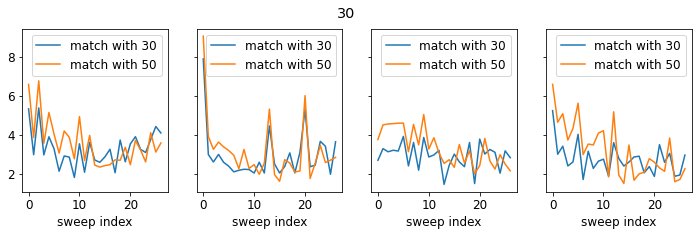

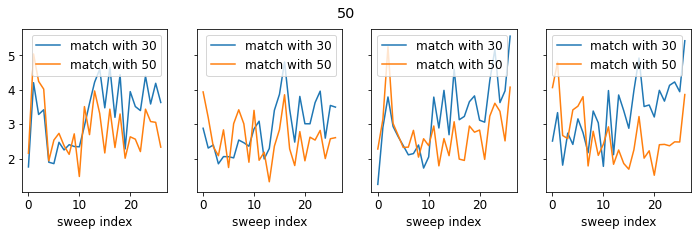

In [10]:
def create_fingerprints(mat, method=None):
    """
    mat is of shape n_sweeps x n_mics x n_freqs
    """
    if method is None:
        return mat
    elif method == 'fft':
        return np.abs(np.fft.rfft(mat, axis=2))
    
method = 'fft'
#method = None

sim = 'norm'
#sim = 'cosine'

fingerprints = {
    d: np.mean(create_fingerprints(mat, method=method), axis=0) for d, mat in all_data.items()
}

for distance, stft_matrix_calib in all_data.items():
    
    fig, axs = plt.subplots(1, len(mics), sharey=True)
    fig.set_size_inches(3*len(mics), 3)
    fig.suptitle(distance)
    
    online_fp = create_fingerprints(stft_matrix_calib, method=method)
    
    for i, mic_i in enumerate(mics):
        for d, fingerprint in fingerprints.items():
            if sim == 'norm':
                matches = np.linalg.norm(online_fp[:, mic_i, :] - fingerprint[None, mic_i, :], axis=-1)
            elif sim == 'cosine': 
                matches = []
                for j in range(online_fp.shape[0]): 
                    norm = np.linalg.norm(fingerprint[mic_i, :]) * np.linalg.norm(online_fp[j, mic_i, :])
                    matches.append(np.inner(online_fp[j, mic_i, :], fingerprint[mic_i, :]) / norm)
            axs[i].plot(matches, label=f'match with {d}')
        axs[i].legend()
        axs[i].set_xlabel('sweep index')

# Full study

In [29]:
def plot_positions(ax, positions_cm):
    from matplotlib import cm
    
    cmap = cm.get_cmap('inferno') 
    n_labels = 3
    label = None
    step = len(positions_cm) // n_labels
    for i, p in enumerate(positions_cm):
        if i % step == 0 or (i == len(positions_cm) - 1):
            label = f'position {i}'
        ax.scatter(*p[:2], color=cmap(i / len(positions_cm)), label=label)
        label=None
    ax.plot(positions_cm[:, 0], positions_cm[:, 1], color='k', ls=':')
    ax.axis('equal')
    ax.set_xlabel('x [cm]')
    ax.set_ylabel('y [cm]')
    ax.axhline(y=0, color='k', label='wall')
    ax.grid()
    ax.legend()

In [30]:
def get_positions_flying(row, start_distance_cm):
    #start = row.positions[2, :3] * 1e2
    #print('starting positions:', row.positions[:5, :3])
    start = [0, 0]
    positions_cm = np.c_[
        start[0] - (row.positions[:, 0] * 1e2),
        start[1] - (row.positions[:, 1] * 1e2) + start_distance_cm ,
        row.positions[:, 2] * 1e2
    ]
    #print('new starting position:', positions_cm[0, :])
    #print('new ending position:', positions_cm[-1, :])
    return positions_cm, row.positions[:, 3]

In [31]:
def extract_valid(row):
    positions_cm, yaws_deg = get_positions_flying(row, start_distance_cm=95)
    freqs = row.frequencies_matrix[0, :]
    
    print('starting frequencies', row.frequencies_matrix[:, 0])
    values = np.abs(row.stft)[..., freqs>0] # n_times x n_mics x freqs
    distances = positions_cm[:, 1]
    freqs_valid = freqs[freqs>0]
    
    forward_indices = np.ones(len(distances), dtype=bool)
    #print("all", len(distances))
    forward_indices[1:] &= (distances[1:] - distances[:-1] <= 0)
    print("forward:", np.sum(forward_indices))
    forward_indices &= positions_cm[:, 2] > 30
    #print(forward_indices)
    #print("flying:", np.sum(forward_indices))
    means = np.sum(np.mean(values, axis=-1), axis=-1)
    crashs = np.where((means - np.mean(means)) > (2 * np.std(means)))[0]
    if len(crashs):
        print('crashs found:', crashs)
        forward_indices[crashs[0]:] = 0
    else:
        print('no crashs found')
        pass
    
    values = values[forward_indices, :]
    distances = distances[forward_indices]
    positions_cm = positions_cm[forward_indices, :]
    yaws_deg = yaws_deg[forward_indices]

    #sort_idx = np.argsort(distances)
    #distances = distances[sort_idx]
    #values_sorted = values[sort_idx, ...]
    return distances, freqs_valid, values, positions_cm, yaws_deg

In [32]:
def plot_matrix(dists_cm, results_matrix, d_estimates, no_deco=False):
    fig, ax = plt.subplots()
    fig.set_size_inches(2 * FIGSIZE, FIGSIZE)
    im = pcolorfast_custom(
        ax,
        np.arange(n_points),
        dists_cm,
        np.log10(results_matrix),
        vmin=-3,
    )
    ax.plot(
        np.arange(n_points) + 0.5,
        xvalues,
        color="white",
        label="ground truth",
        marker='x'
    )
    ax.set_ylim(min(dists_cm), max(dists_cm))
    ax.plot(
        np.arange(n_points) + 0.5,
        d_estimates,
        color="white",
        label="estimates",
        marker='o',
        ls='-'
    )
    if not no_deco:
        add_colorbar(fig, ax, im, title="log-probability")
        ax.set_ylabel("estimated distance [cm]")
        ax.set_xlabel("real distance [cm]")
        ax.set_title(f"appendix{appendix}, {n_points} measurements")
        leg = ax.legend(framealpha=0, loc='upper right')
        for text in leg.get_texts():
            plt.setp(text, color='w')
        ax.set_xticklabels(np.round(xvalues, 1), rotation=90)
        ax.set_yticks(np.arange(min(dists_cm), max(dists_cm), step=10))
        ax.set_yticklabels(np.arange(min(dists_cm), max(dists_cm), step=10).astype(int))
    else:
        ax.set_yticks([])
        ax.set_xticks([])
    return fig, ax

def get_estimates(results_matrix, dists_cm):
    valid = np.any(results_matrix > 0, axis=0)
    d_estimates = dists_cm[np.argmax(results_matrix, axis=0)]
    d_estimates[~valid] = np.nan
    return d_estimates

In [35]:
from crazyflie_description_py.experiments import WALL_ANGLE_DEG
from plotting_tools import pcolorfast_custom, FIGSIZE, save_fig
from plotting_tools import add_colorbar
from inference import Inference, eps_normalize
from estimators import DistanceEstimator
from moving_estimators import MovingEstimator
from copy import deepcopy
import itertools
import time
from matplotlib.patches import Rectangle

import pdb;

from plotting_tools import plot_performance

def add_rect(ax, width, height, no_deco=False):
    rect = Rectangle((0, 0), width, height, facecolor='white', alpha=0.5)
    ax.add_patch(rect)
    if not no_deco:
        ax.text(width/2, 7, "used for\ncalibration", fontdict={'color':'white', 'ha':'center', 'va':'bottom'})

azimuth_deg = WALL_ANGLE_DEG
n_calib = 5
n_window = 3
bad_freqs = []
#bad_freqs = [[3500, 3900]]

plot_dict = [
    #{"exp_name": "2021_11_23_demo", "motors": "linear_buzzer_cont", "appendix": ""},
    {"exp_name": "2021_10_12_flying", "motors": "linear_buzzer_cont", "appendix": "_new3"},
    #{"exp_name": "2021_10_12_flying", "motors": "linear_buzzer_cont", "appendix": "_new4"},
    #{"exp_name": "2021_10_12_flying", "motors": "linear_buzzer_cont", "appendix": "_new6"},
    #{"exp_name": "2021_10_12_flying", "motors": "linear_buzzer_cont", "appendix": "_new7"},
    #{"exp_name": "2021_10_12_flying", "motors": "linear_buzzer_cont", "appendix": "_new8"},
    #{"exp_name": "2021_10_12_flying", "motors": "linear_buzzer_cont", "appendix": "_new10"},
    #{"exp_name": "2021_10_12_flying", "motors": "linear_buzzer_cont", "appendix": "_new12"},
    #{"exp_name": "2021_10_12_flying", "motors": "linear_buzzer_cont", "appendix": "_1"},
    #{"exp_name": "2021_10_12_flying", "motors": "linear_buzzer_cont", "appendix": "_2"},
    #{"exp_name": "2021_10_12_flying", "motors": "linear_buzzer_cont", "appendix": "_3"},
    #{"exp_name": "2021_10_12_flying", "motors": "linear_buzzer_cont", "appendix": "_4"},
    #{"exp_name": "2021_10_12_flying", "motors": "linear_buzzer_cont", "appendix": "_5"},
    #{"exp_name": "2021_10_12_flying", "motors": "linear_buzzer_cont", "appendix": "_6"},
    #{"exp_name": "2021_07_14_flying", "motors": "linear_buzzer_cont", "appendix":"_17"},
    #{"exp_name": "2021_07_14_flying", "motors": "linear_buzzer_cont", "appendix":"_18"},
    #{"exp_name": "2021_07_14_flying", "motors": "linear_buzzer_cont", "appendix":"_19"},
]

errors_df = pd.DataFrame(
    columns=["algorithm", "mics", "calib_method", "estimates", "distances", "appendix", "time"]
)

#calib_method_list = ["on_the_fly"] 
calib_method_list = ["stepper"]
# mic_list = [[0], [1], [2], [3]]
mic_list = [[0, 1, 2, 3]] #[[1, 3], [0, 2], [0, 1, 3], [0, 1, 2, 3]]
algorithm_list = ["bayes"]#, "cost"]
no_deco = True #False

calib = False
for params in plot_dict:
    exp_name, motors, appendix = params.values()

    results_df = pd.read_pickle(f"../experiments/{exp_name}/all_data.pkl")
    row = results_df.loc[
        (results_df.appendix == appendix) & (results_df.motors == motors), :
    ].iloc[0]
    xvalues, yvalues, values_unsorted, positions_cm, yaws_deg = extract_valid(row)
    n_points = values_unsorted.shape[0]

    if not calib:
        calib_on_the_fly = np.median(values_unsorted[:n_calib, :, :], axis=0)
        #calib = True
    #print("calibration:", values_unsorted[:n_calib, :, :])
    std_values = np.std(values_unsorted[:n_calib, :, :], axis=0)

    plot_name_calib = f"plots/experiments/{exp_name}{appendix}_on_the_fly.pdf"
    fig_calib, axs_calib = plt.subplots(1, 5, sharey=True)
    fig_calib.set_size_inches(10, 3)
    axs_calib[0].set_ylabel(f"amplitude [-]")
    for m in range(4):
        axs_calib[m].plot(yvalues, values_unsorted[:n_calib, m, :].T, color=f"C{m}", marker='o')
        axs_calib[m].set_title(f"mic{m}")
        axs_calib[4].errorbar(yvalues, calib_on_the_fly[m], std_values[m], label=f"mic{m}")
        axs_calib[m].set_xlabel(f"frequency [Hz]")
    axs_calib[4].set_xlabel(f"frequency [Hz]")
    axs_calib[4].set_title(f"all mics")
    axs_calib[0].set_ylim(2, 12)
    [axs_calib[0].axvline(f, color='black') for fs in bad_freqs for f in fs]
    save_fig(fig_calib, plot_name_calib)

    # values = np.random.rand(len(yvalues))
    # yvalues_grid, values_grid = interpolate_parts(yvalues, values)
    # fig = plt.figure()
    # fig.set_size_inches(10, 5)
    # plt.plot(yvalues, values, marker='+', label='original')
    # plt.plot(yvalues_grid, values_grid, marker='+', label='interpolated')
    # plt.legend()
    # break

    fig, ax = plt.subplots()
    fig.set_size_inches(FIGSIZE, FIGSIZE)
    plot_positions(ax, positions_cm)
    plot_name = f"plots/experiments/{exp_name}{appendix}_positions.pdf"
    save_fig(fig, plot_name)

    inf_machine = Inference()
    dists_cm = DistanceEstimator.DISTANCES_M * 1e2
    inf_machine.add_geometry([dists_cm[0], dists_cm[-1]], WALL_ANGLE_DEG)

    for calib_method in calib_method_list:
        if calib_method == "on_the_fly":
            # calib_function = get_calib_function("stepper")
            # will be overwritten
            calib_values = calib_on_the_fly
        else:
            calib_function = get_calib_function(calib_method)
            calib_values = calib_function(yvalues)
        values_unsorted_calib = values_unsorted / calib_values

        for mics, algorithm in itertools.product(mic_list, algorithm_list):
            mics_str = str(mics).replace(" ", "")
            plot_name = f"plots/experiments/{exp_name}{appendix}_{algorithm}_{calib_method}_{mics_str}"

            results_matrix = np.full((len(dists_cm), n_points), np.nan)
            results_matrix_moving = np.full((len(dists_cm), n_points), np.nan)

            moving_estimator = MovingEstimator(n_window=n_window)
            
            time_moving = 0
            time_single = 0
            for i in range(n_points):
                
                #print("magnitudes", values_unsorted[i])
                #print("calib magnitudes", values_unsorted_calib[i])

                #if (calib_method == "on_the_fly") and (i < n_calib):
                #    continue

                # important to reinitialize!
                distance_estimator = DistanceEstimator()

                # inf_machine.add_data(values_theo[:, :, i], yvalues_theo)
                
                # TODO(FD) figure out if below helps
                #if i < (n_points - 1):
                #    rel_dist = xvalues[i+1] - xvalues[i]
                #else:
                rel_dist = 5
                inf_machine.add_data(
                    values_unsorted_calib[i],
                    yvalues,
                    distances=-np.linspace(0, rel_dist, len(yvalues)),
                )
                
                # TODO(FD) check again if this helps...
                inf_machine.filter_out_freqs(freq_ranges=bad_freqs)
                
                t1 = time.time()
                for mic_idx in mics:
                    dist, prob_mic, diff = inf_machine.do_inference(algorithm, mic_idx)
                    distance_estimator.add_distribution(diff * 1e-2, prob_mic, mic_idx)

                d_m, prob = distance_estimator.get_distance_distribution(
                    distances_m=dists_cm * 1e-2, verbose=False, azimuth_deg=azimuth_deg,
                )
                np.testing.assert_allclose(d_m*1e2, dists_cm)
                time_single += int(1000*(time.time() - t1))

                # TODO(FD): maybe remove requirement to have angle distribution
                #d_est_m = d_m[np.argmax(prob)]
                #angle, prob_angle = distance_estimator.get_angle_distribution(
                #    distance_estimate_m=d_est_m
                #)

                t1 = time.time()
                moving_estimator.add_distributions(
                    dist_cm=dists_cm, dist_p=prob, position_cm=positions_cm[i], rot_deg=yaws_deg[i]
                )
                test_cm, prob_moving = moving_estimator.get_distance_distribution(
                    distances_cm=dists_cm
                )
                np.testing.assert_allclose(test_cm, dists_cm)
                time_moving += int(1000*(time.time() - t1))
                
                results_matrix_moving[:, i] = prob_moving 
                results_matrix[:, i] = prob

            d_estimates = get_estimates(results_matrix, dists_cm)
            errors_df.loc[len(errors_df), :] = {
                "algorithm": algorithm,
                "mics": mics_str,
                "calib_method": calib_method,
                "estimates": d_estimates,
                "distances": xvalues,
                "appendix": appendix,
                "time": time_single / n_points 
            }
            fig, ax = plot_matrix(dists_cm, results_matrix, d_estimates, no_deco=no_deco)
            if calib_method == 'on_the_fly':
                add_rect(ax, n_calib, max(dists_cm), no_deco=no_deco)
            save_fig(fig, plot_name + "_probabilities.pdf")

            d_estimates_moving = get_estimates(results_matrix_moving, dists_cm)
            errors_df.loc[len(errors_df), :] = {
                "algorithm": algorithm + f"_win{n_window}",
                "mics": mics_str,
                "calib_method": calib_method,
                "estimates": d_estimates_moving,
                "distances": xvalues,
                "appendix": appendix,
                "time": time_moving / n_points 
            }
            fig, ax = plot_matrix(dists_cm, results_matrix_moving, d_estimates_moving, no_deco=no_deco)
            if calib_method == 'on_the_fly':
                add_rect(ax, n_calib, max(dists_cm), no_deco=no_deco)
            save_fig(fig, plot_name + f"_win{n_window}_probabilities.pdf")

FileNotFoundError: [Errno 2] No such file or directory: '../experiments/2021_11_23_demo/all_data.pkl'

In [34]:
fname = f'../experiments/{exp_name}/results.pkl'
errors_df.to_pickle(fname)
print('saved as', fname)

saved as ../experiments/2021_10_12_flying/results.pkl


In [24]:
def plot_random(axs, dists):
    np.random.seed(1)
    errors_rand = []
    for d in dists:
        d_rand = np.random.choice(range(7, 100))
        errors_rand.append(d_rand - d)
    axs[0].plot(dists, errors_rand, color='k', label='random', ls='', marker='x', markersize=2)
    axs[1].plot(sorted(np.abs(errors_rand)), np.linspace(0, 1, len(errors_rand)), color='k', ls='', label='random', marker='x', markersize=2)
    axs[1].legend(loc='lower right')

saved as plots/experiments/2021_10_12_flying_[0,1,2,3]_bayes_cdf.pdf
saved as plots/experiments/2021_10_12_flying_[0,1,2,3]_bayes_win3_cdf.pdf


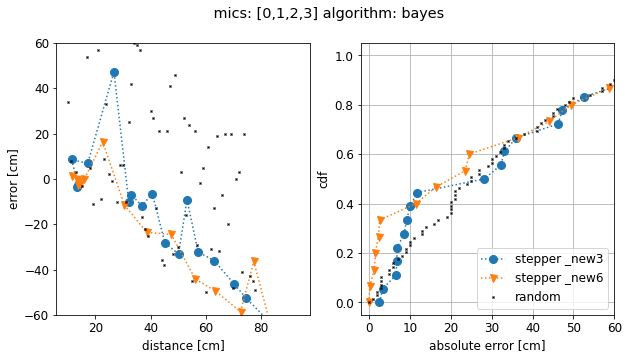

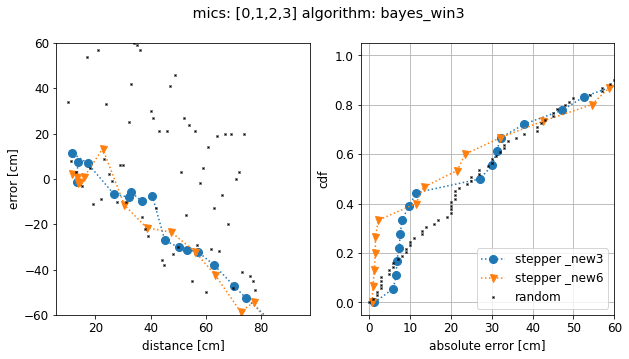

In [25]:
from plotting_tools import plot_performance, save_fig

#exp_name = '2021_10_12_flying'

fname = f'../experiments/{exp_name}/results.pkl'
errors_df = pd.read_pickle(fname)

chosen_mics = '[0,1,2,3]'

filtered_df = errors_df.loc[errors_df.mics==chosen_mics]
groupby = ['mics', 'algorithm']

total_err_dict = {}
for j, (labels, df) in enumerate(filtered_df.groupby(groupby, sort=False)):
    params = dict(zip(groupby, labels))
        
    err_dict = {}
    dist_dict = {}
    errors_all = []
    distances_all = []
    for i, row in df.iterrows():
        errors = row.estimates - row.distances
        key = ' '.join(row.drop(['distances', 'estimates', 'time'] + groupby).values)
        err_dict[key] = errors
        dist_dict[key] = row.distances
        errors_all += list(errors[~np.isnan(errors)])
        distances_all += list(row.distances[~np.isnan(errors)])
        
    sort_idx = np.argsort(distances_all)
    total_err_dict[j] = {
        'errors': np.array(errors_all)[sort_idx],
        'distances': np.array(distances_all)[sort_idx],
        **params
    }
    
    title = ''
    for k,l in params.items():
        title = f"{title} {k}: {l}"

    fig, axs = plot_performance(err_dict, xs_dict=dist_dict, xlabel="distance [cm]", ylabel="error [cm]")
    plot_random(axs, range(10, 80))
    #fig, axs = plot_performance(err_dict, xlabel="distance [cm]", ylabel="error [cm]")
    fig.suptitle(title)
    axs[0].get_legend().set_visible(False)
    axs[0].set_ylim(-60, 60)
    axs[1].set_xlim(-2, 60)
    save_fig(fig, f'plots/experiments/{exp_name}_{chosen_mics}_{params["algorithm"]}_cdf.pdf')

saved as plots/experiments/2021_10_12_flying_[0,1,2,3]_cdf.pdf


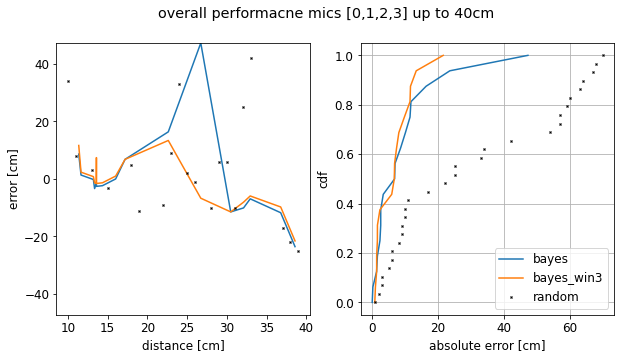

In [27]:
max_dist = 40
err_dict = {}
dist_dict = {}
for total_dict in total_err_dict.values():
    key = total_dict['algorithm']
    errors = total_dict['errors']
    dists = total_dict['distances']
    err_dict[key] = errors[dists < 40]
    dist_dict[key] = dists[dists < 40]
    
fig, axs = plot_performance(err_dict, xs_dict=dist_dict, xlabel="distance [cm]", ylabel="error [cm]", marker_flag=False)
axs[0].get_legend().set_visible(False)
plot_random(axs, range(10, max_dist))
fig.suptitle(f'overall performacne mics {chosen_mics} up to {max_dist}cm')
save_fig(fig, f'plots/experiments/{exp_name}_{chosen_mics}_cdf.pdf')